# Gaussian Processes (Julia)

This example demonstrates [GaussianProcesses.jl](https://github.com/STOR-i/GaussianProcesses.jl). We fit the model, tune its hyperparameters with GridSearchCV, and compute the cross-validation score.

In [1]:
using ScikitLearn
using ScikitLearn.GridSearch
using PyPlot
using GaussianProcesses: GP, MeanZero, SE

srand(42)
# Training data
n = 10
x = 2π * rand(n, 1)
y = sin.(x[:, 1]) + 0.05*randn(n)


Use "const MatF64 = AbstractMatrix{Float64}" instead.

Use "const VecF64 = AbstractVector{Float64}" instead.

Use "abstract type Mean end" instead.

Use "abstract type Kernel end" instead.

Use "abstract type KernelData end" instead.

Use "abstract type Stationary<:Kernel end" instead.

Use "abstract type StationaryData<:KernelData end" instead.

Use "abstract type Isotropic<:Stationary end" instead.

Use "abstract type StationaryARD<:Stationary end" instead.

Use "abstract type MaternIso<:Isotropic end" instead.

Use "abstract type MaternARD<:StationaryARD end" instead.


10-element Array{Float64,1}:
 -0.152869
  0.294195
  0.136808
  0.959604
 -0.236843
 -0.209638
  0.977491
  0.816858
 -0.246879
 -0.547982

Fit a GP with hand-specified parameters:

In [2]:
# Select mean and covariance function
mZero = MeanZero()                   # Zero mean function
kern = SE(0.0,0.0)                   # Squared exponential kernel with parameters
                                     # log(ℓ) = 0.0, log(σ) = 0.0
gp = fit!(GP(m=mZero,k=kern, logNoise=-1.0), x,y);

Use cross-validation to find the optimal noise level and (log) signal standard deviation σ

In [3]:
gp_cv = fit!(GridSearchCV(GP(m=mZero,k=SE(0.0,0.0)), Dict(:logNoise=>collect(-10:0.3:10), :k_lσ=>collect(0:0.1:5))), x, y);
best_gp = gp_cv.best_estimator_;
@show get_params(best_gp)[:logNoise] get_params(best_gp)[:k_lσ]
nothing

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] exp(::Array{Float64,1}) at ./deprecated.jl:57
 [3] set_params!(::GaussianProcesses.SEIso, ::Array{Float64,1}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/kernels/se_iso.jl:18
 [4] #set_params!#33(::Array{Any,1}, ::Function, ::GaussianProcesses.SEIso) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:93
 [5] (::ScikitLearnBase.#kw##set_params!)(::Array{Any,1}, ::ScikitLearnBase.#set_params!, ::GaussianProcesses.SEIso) at ./<missing>:0
 [6] #set_params!#32(::Array{Any,1}, ::Function, ::GaussianProcesses.GP) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:77
 [7] (::ScikitLearnBase.#kw##set_params!)(::Array{Any,1}, ::ScikitLearnBase.#set_params!, ::GaussianProcesses.GP) at ./<missing>:0
 [8] #_fit_and_score#96(::Bool, ::Bool, ::String, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}, ::Array{Float64,1}, ::Function, ::Array{Int64,1}, ::Array{Int64,1}, ::Int64, :

(get_params(best_gp))[:logNoise] = 2.6
(get_params(best_gp))[:k_lσ] = 4.8


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] #predict#17(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/GP.jl:206
 [4] (::GaussianProcesses.#kw##predict)(::Array{Any,1}, ::GaussianProcesses.#predict, ::GaussianProcesses.GP, ::Array{Float64,2}) at ./<missing>:0
 [5] #predict#29(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:10
 [6] predict(::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:10
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at /Users/cedric/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/cedric/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::ZMQ.S

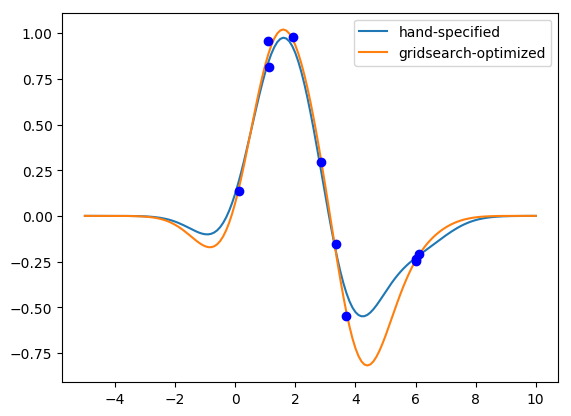

 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] #predict#17(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/GP.jl:206
 [4] (::GaussianProcesses.#kw##predict)(::Array{Any,1}, ::GaussianProcesses.#predict, ::GaussianProcesses.GP, ::Array{Float64,2}) at ./<missing>:0
 [5] #predict#29(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:10
 [6] predict(::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:10
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at /Users/cedric/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/cedric/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::ZMQ.Socket) at /U

In [4]:
xx = -5:0.1:10
plot(xx, predict(gp, reshape(collect(xx), length(xx), 1)), label="hand-specified")
plot(xx, predict(best_gp, reshape(collect(xx), length(xx), 1)), label="gridsearch-optimized")
plot(x, y, "bo")
legend();

`GridSearchCV` can tune all kernel and mean parameters:

In [5]:
get_params(gp)

Dict{Symbol,Float64} with 4 entries:
  :k_lσ     => 0.0
  :m_β      => 0.0
  :logNoise => -1.0
  :k_ll     => 0.0

# Example 2 - cross-validation

In [6]:
using ScikitLearn, PyPlot
using ScikitLearn.CrossValidation: cross_val_score

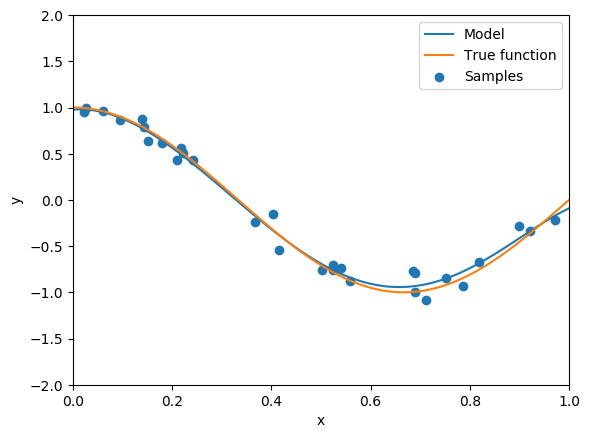

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] #predict#17(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/GP.jl:206
 [4] (::GaussianProcesses.#kw##predict)(::Array{Any,1}, ::GaussianProcesses.#predict, ::GaussianProcesses.GP, ::Array{Float64,2}) at ./<missing>:0
 [5] #predict#29(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:10
 [6] predict(::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:10
 [7] include_string(::String, ::String) at ./loading.jl:515
 [8] include_string(::Module, ::String, ::String) at /Users/cedric/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/cedric/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::ZMQ.S

In [9]:
srand(2)

n_samples = 30
degrees = [1, 4, 15]

true_fun(X) = cos.(1.5 * pi * X)
X = rand(n_samples)
y = true_fun(X) + randn(n_samples) * 0.1

gp = fit!(GP(logNoise=-10.0), hcat(X), y)

X_test = linspace(0, 1, 100)
plot(X_test, predict(gp, hcat(X_test)), label="Model")
plot(X_test, true_fun(X_test), label="True function")
scatter(X, y, label="Samples")
xlabel("x")
ylabel("y")
xlim((0, 1))
ylim((-2, +2))
legend(loc="best");

Cross-validation score:

In [10]:
mean(cross_val_score(gp, hcat(X), y, cv=10))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at ./deprecated.jl:57
 [3] #predict#17(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/GP.jl:206
 [4] (::GaussianProcesses.#kw##predict)(::Array{Any,1}, ::GaussianProcesses.#predict, ::GaussianProcesses.GP, ::Array{Float64,2}) at ./<missing>:0
 [5] #predict#29(::Bool, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}) at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:10
 [6] score at /Users/cedric/.julia/v0.6/GaussianProcesses/src/glue/ScikitLearn.jl:24 [inlined]
 [7] _score(::GaussianProcesses.GP, ::Array{Float64,2}, ::Array{Float64,1}, ::ScikitLearnBase.#score) at /Users/cedric/.julia/v0.6/ScikitLearn/src/cross_validation.jl:651
 [8] #_fit_and_score#96(::Bool, ::Bool, ::String, ::Function, ::GaussianProcesses.GP, ::Array{Float64,2}, ::Array{Float64,1}, ::Function, ::Array{Int64,1}, ::Array{

-0.013787821187035315